### USER BASED COLLABORATIVE FILTERING

In [1]:
## import libraries

import numpy as np
import pandas as pd

In [2]:
animes = pd.read_csv("anime.csv")

In [3]:
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
ratings = pd.read_csv("rating 2.csv")

In [5]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
len(ratings)

7813737

In [7]:
ratings['rating'].unique()

array([-1, 10,  8,  6,  9,  7,  3,  5,  4,  1,  2])

In [8]:
ratings = ratings[ratings.rating != -1]

In [9]:
ratings.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [10]:
ratings['rating'].unique()

array([10,  8,  6,  9,  7,  3,  5,  4,  1,  2])

In [11]:
## EDA or Data Exploration

In [12]:
len(ratings)

6337241

In [13]:
## Number of users
len(ratings['user_id'].unique())

69600

In [14]:
# Number of unique movies
len(animes['anime_id'].unique())

12294

In [15]:
import statistics

In [16]:
ratings.head(1)

,user_id,anime_id,rating
47,1,8074,10


In [17]:
ratings_per_user = ratings.groupby('user_id')['rating'].count()

In [18]:
ratings_per_user

user_id
1          4
2          1
3         92
5        459
7        343
        ... 
73512     12
73513     33
73514      1
73515    179
73516      2
Name: rating, Length: 69600, dtype: int64

In [19]:
statistics.mean(ratings_per_user.tolist())

91.05231321839081

In [20]:
## Distribution of ratings per user

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

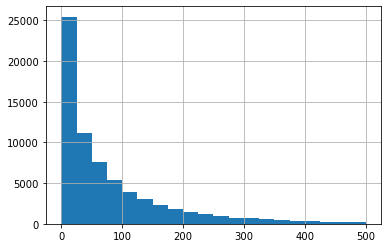

In [24]:
ratings_per_user.hist(bins=20, range=(0, 500))

In [25]:
## Average number of ratings given per anime
ratings_per_anime = ratings.groupby('anime_id')['rating'].count()

In [28]:
ratings_per_anime

anime_id
1        13449
5         5790
6         9385
7         2169
8          308
         ...  
34324       11
34325       15
34349        3
34367        4
34475        3
Name: rating, Length: 9927, dtype: int64

In [26]:
statistics.mean(ratings_per_anime.tolist())

638.3843054296364

<AxesSubplot:>

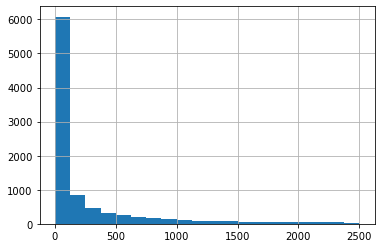

In [27]:
ratings_per_anime.hist(bins=20, range=(0, 2500))

In [30]:
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [31]:
ratings.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [32]:
## Dimensionality Reduction

In [33]:
# counts of ratings per anime as df

ratings_per_anime_df = pd.DataFrame(ratings_per_anime)

In [34]:
ratings_per_anime_df

,rating
anime_id,
1,13449
5,5790
6,9385
7,2169
8,308
...,...
34324,11
34325,15
34349,3


In [35]:
# remove if <1000 ratings

filtered_ratings_per_anime_df = ratings_per_anime_df[ratings_per_anime_df.rating >= 1000]

In [36]:
filtered_ratings_per_anime_df

,rating
anime_id,
1,13449
5,5790
6,9385
7,2169
15,2002
...,...
32729,1802
32828,1200
32935,1038


In [37]:
## Build a list of anime_ids to keep
popular_anime = filtered_ratings_per_anime_df.index.tolist()

In [41]:
# popular_anime

In [42]:
## Filter users who haven't rated many anime

In [44]:
# Count ratings per user convert that to a df

ratings_per_user_df = pd.DataFrame(ratings_per_user)

In [45]:
ratings_per_user_df

,rating
user_id,
1,4
2,1
3,92
5,459
7,343
...,...
73512,12
73513,33
73514,1


In [47]:
## Remove if user has rater less than 500 movies

filtered_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df.rating >= 500]

In [48]:
filtered_ratings_per_user_df

,rating
user_id,
226,742
271,599
294,675
392,598
446,743
...,...
73362,596
73378,723
73395,585


In [49]:
## build a list of user_ids to keep
prolific_users = filtered_ratings_per_user_df.index.tolist()

In [51]:
# prolific_users

In [52]:
# Now filter out anime and users from my dataset, that are not present in the lists

In [53]:
filtered_ratings = ratings[ratings.anime_id.isin(popular_anime)]

In [54]:
filtered_ratings = ratings[ratings.user_id.isin(prolific_users)]

In [55]:
len(filtered_ratings)

1005314

In [59]:
filtered_ratings

,user_id,anime_id,rating
17304,226,1,8
17305,226,6,8
17306,226,20,7
17307,226,25,6
17308,226,27,7
...,...,...,...
7812698,73502,18893,9
7812699,73502,19151,5
7812700,73502,19221,6
7812701,73502,19367,6


In [57]:
rating_matrix = filtered_ratings.pivot_table(index='user_id',
                                            columns='anime_id',
                                            values='rating')

In [58]:
rating_matrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,9.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73362,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73378,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73395,10.0,9.0,10.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# replace NaN values with 0
rating_matrix = rating_matrix.fillna(0)

In [62]:
rating_matrix.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
## Recommend movie to user_id--> 226

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
import operator

In [68]:
def similar_users(user_id, matrix, k=3):
    # create a df of just the current_user
    user = matrix[matrix.index==user_id]
    
    # dataframe of all other users
    other_users = matrix[matrix.index != user_id]
    
    # Calculate cosine similarity between input user and all other users
    similarities = cosine_similarity(user, other_users)[0].tolist()
    
    # create a list of indices for these users
    indices = other_users.index.tolist()
    
    # create a key value pair (dict) of user index and their similarity
    index_similarity = dict(zip(indices, similarities))
    
    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(),
                                    key=operator.itemgetter(1))
    
    index_similarity_sorted.reverse()
    
    # grab top k users from the top
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    return users

In [69]:
current_user = 226
similar_user_indices = similar_users(current_user, rating_matrix)

In [70]:
similar_user_indices

[30773, 39021, 45603]

In [88]:
## Create a method that will recommend movies
def recommend_item(user_index, similar_user_indices, matrix, items=5):
    # create vectors for similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    
    # calculate average ratings across the similar users
    similar_users = similar_users.mean(axis=0)
    
    #convert this to dataframe and then filter
    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])
    
    # create vector for the current_user
    user_df = matrix[matrix.index == user_index]
    
    # transpose the dataframe for filtration
    user_df_transposed = user_df.transpose()
    
    # rename the column as rating
    user_df_transposed.columns = ['rating']
    
    # remove any row withou a 0 value. (Movie has not been watched yet)
    user_df_transposed = user_df_transposed[
        user_df_transposed['rating']==0]
    
    # generate a list of animes the user has not seen
    animes_unseen = user_df_transposed.index.tolist()
    
    # filter average ratings of similar users for only those movies that the
    # current user has not seen
    similar_users_df_filtered = similar_users_df[
        similar_users_df.index.isin(animes_unseen)]
    
    # order or sort the dataframe
    similar_users_df_ordered = similar_users_df.sort_values(
    by=['mean'], ascending = False)
    
    ## Pick the top N movies from the dataframe
    top_n_anime = similar_users_df_ordered.head(items)
    top_n_anime_indices = top_n_anime.index.tolist()
    
    # Look up for these animes in the dataframe
    anime_information = animes[animes['anime_id'].isin(
    top_n_anime_indices)]
    
    return anime_information
  

In [89]:
recommend_item(226, similar_user_indices, rating_matrix)

user_id   226
anime_id     
1         8.0
5         0.0
6         8.0
7         0.0
8         0.0
...       ...
34324     0.0
34325     0.0
34349     0.0
34367     0.0
34475     0.0

[9591 rows x 1 columns]


,anime_id,name,genre,type,episodes,rating,members
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
39,12365,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.71,133620
87,10030,Bakuman. 2nd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.53,151561
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817
184,7674,Bakuman.,"Comedy, Romance, Shounen",TV,25,8.35,246899


### CONTENT BASED COLLABORATIVE FILTERING

In [90]:
import ast
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [91]:
movies_df = pd.read_csv("movies_metadata (1).csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [94]:
movies_df.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [95]:
ratings = pd.read_csv("ratings_small (1).csv")

In [96]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [97]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [102]:
movies_df = movies_df.drop(['belongs_to_collection', 'budget', 'homepage', 
                            'original_language',  'release_date', 'revenue', 
                            'runtime', 'spoken_languages', 'status', 'tagline', 
                            'status', 'video', 'production_companies', 'poster_path', 
                            'production_countries'], axis=1)

In [103]:
movies_df.head(1)

,adult,genres,id,imdb_id,original_title,overview,popularity,title,vote_average,vote_count
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,5415.0


In [104]:
movies_df['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [105]:
movies_df['genres'] = movies_df['genres'].fillna('[]').apply(literal_eval).apply(
lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [106]:
movies_df['genres'][0]

['Animation', 'Comedy', 'Family']

In [107]:
movies_df.head()

,adult,genres,id,imdb_id,original_title,overview,popularity,title,vote_average,vote_count
0,False,"[Animation, Comedy, Family]",862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,5415.0
1,False,"[Adventure, Fantasy, Family]",8844,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,Jumanji,6.9,2413.0
2,False,"[Romance, Comedy]",15602,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,Grumpier Old Men,6.5,92.0
3,False,"[Comedy, Drama, Romance]",31357,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Waiting to Exhale,6.1,34.0
4,False,[Comedy],11862,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,Father of the Bride Part II,5.7,173.0


In [ ]:
## Approach 1 -- Based on vote_average & vote_count, I can create a recommender system
## Sort movies based on vote count and vote average and then display the top K movies

In [108]:
movies_df['overview'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [110]:
# Vote Count
V = movies_df[movies_df['vote_count'].notnull()]['vote_count'].astype('float')

# Vote Average
R = movies_df[movies_df['vote_average'].notnull()]['vote_average'].astype('float')

In [111]:
# Vote_aver_mean
C = R.mean()

In [112]:
# Minimum votes required to get into consideration
M = V.quantile(0.95)

In [116]:
df = pd.DataFrame()
df = movies_df[(movies_df['vote_count'] >= M) & (movies_df['vote_average'].notnull())
              ][['title', 'vote_count','popularity', 'genres', 'overview', 'vote_average']]

In [117]:
df.head()

,title,vote_count,popularity,genres,overview,vote_average
0,Toy Story,5415.0,21.946943,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",7.7
1,Jumanji,2413.0,17.015539,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,6.9
5,Heat,1886.0,17.924927,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",7.7
9,GoldenEye,1194.0,14.686036,"[Adventure, Action, Thriller]",James Bond must unmask the mysterious head of ...,6.6
15,Casino,1343.0,10.137389,"[Drama, Crime]",The life of the gambling paradise – Las Vegas ...,7.8


In [118]:
df['Weighted_average'] = ((R*V) + (C*M))/ (V+M)

In [120]:
df.head()

,title,vote_count,popularity,genres,overview,vote_average,Weighted_average
0,Toy Story,5415.0,21.946943,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",7.7,7.545529
1,Jumanji,2413.0,17.015539,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,6.9,6.704602
5,Heat,1886.0,17.924927,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...",7.7,7.310561
9,GoldenEye,1194.0,14.686036,"[Adventure, Action, Thriller]",James Bond must unmask the mysterious head of ...,6.6,6.338269
15,Casino,1343.0,10.137389,"[Drama, Crime]",The life of the gambling paradise – Las Vegas ...,7.8,7.267137


In [121]:
recm_movies = df.sort_values('Weighted_average', ascending=False).head(500)

In [122]:
recm_movies.head()

,title,vote_count,popularity,genres,overview,vote_average,Weighted_average
314,The Shawshank Redemption,8358.0,51.645403,"[Drama, Crime]",Framed in the 1940s for the double murder of h...,8.5,8.357746
834,The Godfather,6024.0,41.109264,"[Drama, Crime]","Spanning the years 1945 to 1955, a chronicle o...",8.5,8.306334
12481,The Dark Knight,12269.0,123.167259,"[Drama, Action, Crime, Thriller]",Batman raises the stakes in his war on crime. ...,8.3,8.208376
2843,Fight Club,9678.0,63.869599,[Drama],A ticking-time-bomb insomniac and a slippery s...,8.3,8.184899
292,Pulp Fiction,8670.0,140.950236,"[Thriller, Crime]","A burger-loving hit man, his philosophical par...",8.3,8.172155


In [123]:
## Approach 2: By Popularity and Genre

In [124]:
popular = pd.DataFrame()

In [125]:
popular = recm_movies.copy()

In [128]:
popular['popularity'] = recm_movies[recm_movies['popularity'].notnull()
                                    ]['popularity'].astype('float')

popoular = popular.sort_values('popularity', ascending=False)

In [129]:
popoular.head()

,title,vote_count,popularity,genres,overview,vote_average,Weighted_average
33356,Wonder Woman,5025.0,294.337037,"[Action, Adventure, Fantasy]",An Amazon princess comes to the world of Man t...,7.2,7.074245
43644,Baby Driver,2083.0,228.032744,"[Action, Crime]",After being coerced into working for a crime b...,7.2,6.927255
24455,Big Hero 6,6289.0,213.849907,"[Adventure, Family, Animation, Action, Comedy]",The special bond that develops between plus-si...,7.8,7.659155
26564,Deadpool,11444.0,187.860492,"[Action, Adventure, Comedy]",Deadpool tells the origin story of former Spec...,7.4,7.334897
26566,Guardians of the Galaxy Vol. 2,4858.0,185.330992,"[Action, Adventure, Comedy, Science Fiction]",The Guardians must fight to keep their newfoun...,7.6,7.437472


In [130]:
s = df.apply(lambda x: pd.Series(x['genres']), axis=1).stack().reset_index(level=1, drop=True)

In [132]:
s.name = 'genre'

In [134]:
gen_movies = recm_movies.drop('genres', axis=1).join(s)

In [136]:
gen_movies.head(5)

,title,vote_count,popularity,overview,vote_average,Weighted_average,genre
0,Toy Story,5415.0,21.946943,"Led by Woody, Andy's toys live happily in his ...",7.7,7.545529,Animation
0,Toy Story,5415.0,21.946943,"Led by Woody, Andy's toys live happily in his ...",7.7,7.545529,Comedy
0,Toy Story,5415.0,21.946943,"Led by Woody, Andy's toys live happily in his ...",7.7,7.545529,Family
5,Heat,1886.0,17.924927,"Obsessive master thief, Neil McCauley leads a ...",7.7,7.310561,Action
5,Heat,1886.0,17.924927,"Obsessive master thief, Neil McCauley leads a ...",7.7,7.310561,Crime


In [137]:
df_w = gen_movies[(gen_movies['genre']=='Action') & (gen_movies['vote_count']>=M)]
df_w.sort_values('Weighted_average', ascending=False).head(5)

,title,vote_count,popularity,overview,vote_average,Weighted_average,genre
12481,The Dark Knight,12269.0,123.167259,Batman raises the stakes in his war on crime. ...,8.3,8.208376,Action
1154,The Empire Strikes Back,5998.0,19.470959,"The epic saga continues as Luke Skywalker, in ...",8.2,8.025793,Action
15480,Inception,14075.0,29.108149,"Cobb, a skilled thief who commits corporate es...",8.1,8.025763,Action
7000,The Lord of the Rings: The Return of the King,8226.0,29.324358,Aragorn is revealed as the heir to the ancient...,8.1,7.975624,Action
256,Star Wars,6778.0,42.149697,Princess Leia is captured and held hostage by ...,8.1,7.950652,Action


## Advanced approach to Content Based Filtering

In [138]:
cont_recm = recm_movies.copy()

In [160]:
cont_recm

,index,title,vote_count,popularity,genres,overview,vote_average,Weighted_average
0,314,The Shawshank Redemption,8358.0,51.645403,"[Drama, Crime]",Framed in the 1940s for the double murder of h...,8.5,8.357746
1,834,The Godfather,6024.0,41.109264,"[Drama, Crime]","Spanning the years 1945 to 1955, a chronicle o...",8.5,8.306334
2,12481,The Dark Knight,12269.0,123.167259,"[Drama, Action, Crime, Thriller]",Batman raises the stakes in his war on crime. ...,8.3,8.208376
3,2843,Fight Club,9678.0,63.869599,[Drama],A ticking-time-bomb insomniac and a slippery s...,8.3,8.184899
4,292,Pulp Fiction,8670.0,140.950236,"[Thriller, Crime]","A burger-loving hit man, his philosophical par...",8.3,8.172155
...,...,...,...,...,...,...,...,...
495,12156,Elite Squad,519.0,10.759577,"[Drama, Action, Crime]","In 1997, before the visit of the pope to Rio d...",7.8,6.806403
496,39663,Hell or High Water,1304.0,12.565896,"[Crime, Drama, Thriller, Western]",A divorced dad and his ex-con brother resort t...,7.2,6.805007
497,2800,Total Recall,1745.0,12.954444,"[Action, Adventure, Science Fiction]",Construction worker Douglas Quaid discovers a ...,7.1,6.804866
498,13204,The Wrestler,1031.0,7.903956,"[Drama, Romance]","Aging wrestler Randy ""The Ram"" Robinson is lon...",7.3,6.801776


In [140]:
cont_recm['overview'][314]

'Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.'

In [151]:
## TFIDF vectorization

In [149]:
tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word',
                      token_pattern = r'\w{1,}',                      
                      ngram_range=(1,3), stop_words='english')

In [150]:
tfv

TfidfVectorizer(min_df=3, ngram_range=(1, 3), stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}')

In [152]:
cont_recm['overview'] = cont_recm['overview'].fillna('')

In [154]:
# Fit the tf-idf on the overview text data
tfv_matrix = tfv.fit_transform(cont_recm['overview'])

In [155]:
## Find cosine similarity
cos_sim = linear_kernel(tfv_matrix, tfv_matrix)

In [156]:
cont_recm = cont_recm.reset_index()

In [157]:
indices = pd.Series(cont_recm.index, index=cont_recm['title'])

In [158]:
indices.head()

title
The Shawshank Redemption    0
The Godfather               1
The Dark Knight             2
Fight Club                  3
Pulp Fiction                4
dtype: int64

In [164]:
def sugg_recm(title):
    # Get the index corresponding to the original title
    idx = indices[title]
    
    # Get the pairwise similarity scores between original title and all other tiles
    sim_scores = list(enumerate(cos_sim[idx]))
    
    # Sort the movies
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:11]
    
    movies_indices = [i[0] for i in sim_scores]
    
    return indices.iloc[movies_indices]

In [165]:
sugg_recm("Star Wars").head(10)

title
The Empire Strikes Back                           9
Star Wars: The Force Awakens                    134
Return of the Jedi                               56
The Princess Bride                              230
Wonder Woman                                    276
The Great Dictator                              215
Star Wars: Episode III - Revenge of the Sith    360
Nausicaä of the Valley of the Wind              347
Big Hero 6                                       68
Aladdin                                         208
dtype: int64

In [166]:
tfv_matrix

<500x1272 sparse matrix of type '<class 'numpy.float64'>'
	with 8254 stored elements in Compressed Sparse Row format>